<div class="alert alert-block alert-info"><font size="6"><b>Sprint 9 Task 2 (S09_T02)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Create at least three different regression models to try to predict form DelayedFlights.csv the flight delay (ArrDelay) as best you can.</SPAN>

Step 1 we **import** all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Now let's load a copy of the dataset with all the data wrangling we did in S09 T01. 

In [2]:
flight = pd.read_csv('../S09 T01 Training and Test Sets/flights_S09T02.csv')
pd.set_option('display.max_columns', 30)

In [3]:
flight.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1936758.0,1610.114540,547.824622,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.263236,1944.702250,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1936758.0,133.370061,72.056587,14.0,80.0,116.0,165.0,1114.0
CRSElapsedTime,1936758.0,134.301390,71.339263,-25.0,82.0,116.0,165.0,660.0
AirTime,1936758.0,108.329285,68.637281,0.0,58.0,90.0,137.0,1091.0
ArrDelay,1936758.0,42.259842,56.779219,-109.0,9.0,25.0,56.0,2461.0
DepDelay,1936758.0,43.185176,53.402502,6.0,12.0,24.0,53.0,2467.0


In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 27 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Date               object
 1   DayOfWeek          object
 2   DepTime            int64 
 3   CRSDepTime         int64 
 4   ArrTime            int64 
 5   CRSArrTime         int64 
 6   UniqueCarrier      object
 7   FlightNum          int64 
 8   TailNum            object
 9   ActualElapsedTime  int64 
 10  CRSElapsedTime     int64 
 11  AirTime            int64 
 12  ArrDelay           int64 
 13  DepDelay           int64 
 14  Origin             object
 15  Dest               object
 16  Distance           int64 
 17  TaxiIn             int64 
 18  TaxiOut            int64 
 19  Cancelled          object
 20  CancellationCode   object
 21  Diverted           object
 22  CarrierDelay       int64 
 23  WeatherDelay       int64 
 24  NASDelay           int64 
 25  SecurityDelay      int64 
 26  LateAircraftDe

In [5]:
flight = flight.drop(['FlightNum', 'TailNum'], axis=1) # we don't need these columns

In order to solve this practice and be able to rerun code faster, I'm going to take a sample from data and do hypotesys testing to verify that mean of DepDelay is equal in sample and population with 95% a level of confidence.  

In [6]:
popmean = flight.ArrDelay.mean()
x = flight.ArrDelay.sample(10000, random_state = 7)
alpha = 0.005

result = stats.ttest_1samp(x, popmean, alternative='two-sided')
print(f'The two tailed P-value is {round(result[1],3)}')

if result[1] < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The two tailed P-value is 0.23
The null hypothesis cannot be rejected


 We will use flights dataset with a sample of 100.00 observations from now onwards.

In [7]:
flights = flight.sample(10000, random_state = 7).reset_index(drop = True) # we use flights dataset from now onwards

<u>**Variable descriptions:**</u>   

1. **Year:** 2008 
2. **Month:** 1-12 
3. **DayofMonth:** 1-31 
4. **DayOfWeek:** 1 (Monday) - 7 (Sunday) 
5. **DepTime:** actual departure time (local, hhmm) 
6. **CRSDepTime:** scheduled departure time (local, hhmm) 
7. **ArrTime:** actual arrival time (local, hhmm) 
8. **CRSArrTime:** scheduled arrival time (local, hhmm) 
9. **UniqueCarrier:** unique carrier code 
10. **FlightNum:** flight number 
11. **TailNum:** plane tail number 
12. **ActualElapsedTime:** in minutes 
13. **CRSElapsedTime:** in minutes 
14. **AirTime:** in minutes 
15. **ArrDelay:** arrival delay, in minutes 
16. **DepDelay:** departure delay, in minutes 
17. **Origin:** origin IATA airport code 
18. **Dest:** destination IATA airport code 
19. **Distance:** in miles 
20. **TaxiIn:** taxi in time, in minutes 
21. **TaxiOut:** taxi out time in minutes 
22. **Cancelled:** was the flight cancelled? 1 = yes, 0 = no
23. **CancellationCode:** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24. **Diverted:** 1 = yes, 0 = no 
25. **CarrierDelay:** in minutes 
26. **WeatherDelay:** in minutes 
27. **NASDelay:** in minutes 
28. **SecurityDelay:** in minutes 
29. **LateAircraftDelay:** in minutes

Source: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7


Now we are going to split the dataset between independent features, called (x), and dependent variable called (y) in order to Train and Test the model. In this case the dependent variable is **ArrDelay**.

In [8]:
from sklearn.model_selection import train_test_split

x = flights.drop(['ArrDelay'], axis = 'columns')
y = pd.DataFrame(flights.ArrDelay)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7) # 80%-20% proportion

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 24), (2000, 24), (8000, 1), (2000, 1))

Now we have the data splited into Tran And Test as we need it for modalization.

### **First model: Simple Linear Regression**

To start modelling we could check wich variables are correlated to our target variable **ArrDelay**. From previous Sprint S09 T01 we had this correlation matrix:

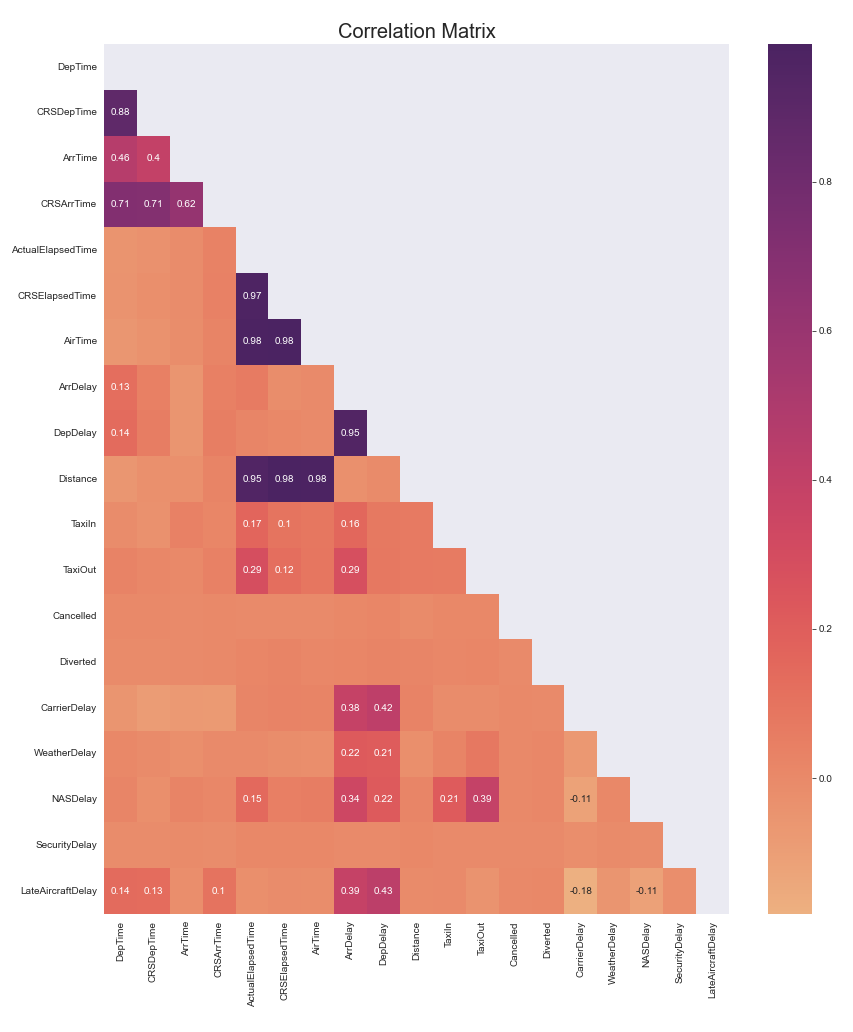

Correlation between target variable **ArrDelay** and **DepDelay** is very strong, **0,95**. Scatter plot below shows this correlation. Let's use DepDelay to predict.

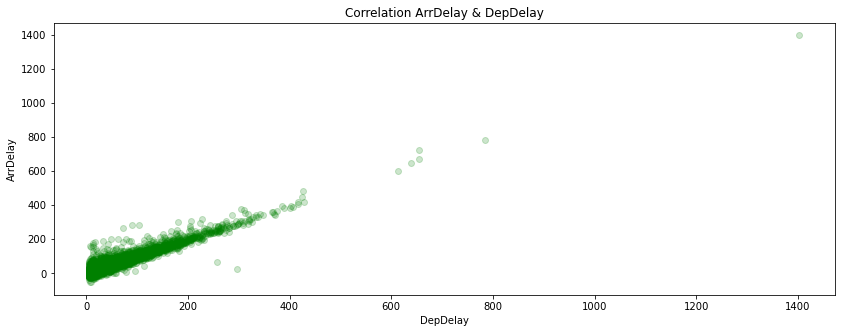

In [10]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(x_train.DepDelay, y_train.ArrDelay, color = 'green', alpha = .2)

plt.title('Correlation ArrDelay & DepDelay')
plt.xlabel('DepDelay')
plt.ylabel('ArrDelay')
plt.show()

Strongly correlated variables.

In [11]:
import statsmodels.api as sm

In [12]:
x_train_const = sm.add_constant(data = x_train.DepDelay) # add constant term

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
slr_model = sm.OLS(y_train, x_train_const).fit()

In [14]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 7.528e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:04:11   Log-Likelihood:                -34520.
No. Observations:                8000   AIC:                         6.904e+04
Df Residuals:                    7998   BIC:                         6.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7955      0.259     -3.077      0.002      -1.302      -0.289
DepDelay       1.0079      0.004    274.380      0.000       1.001       1.015
==============================================================================
Omnibus:                     4107.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168406.593
Skew:                           1.781   Prob(JB):                         0.00
Kurtosis:                      25.193   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary interpretation:

* **Constant term:** The constant terms is the intercept of the regression line. In regression we omits some independent variables that do not have much impact on the dependent variable, the intercept tells the average value of these omitted variables and noise present in model.  
    
    
* **Coefficient term:** The coefficient term tells the change in Y for a unit change in X.  

    
* **Standard error of parameters:** Standard error is also called the standard deviation. Standard error shows the sampling variability of these parameters. 
  

* **t – statistics:** In theory, we assume that error term follows the normal distribution and because of this the parameters b1  and  b2 also have normal distributions with variance calculated in **Standard error of parameters**.
  

* **p – values:** In theory, we read that p-value is the probability of obtaining the t statistics at least as contradictory to H0  as calculated from assuming that the null hypothesis is true. In the summary table, we can see that P-value for both parameters is equal to 0. This is not exactly 0, but since we have very larger statistics p-value will be approximately 0.We can reject the null hypothesis at almost every significance level.
  

* **Confidence intervals:** There are many approaches to test the hypothesis, including the p-value approach mentioned above. The confidence interval approach is one of them. 5% is the standard significance level (alpha) at which C.I’s are made. While calculating p values we rejected the null hypothesis we can see same in C.I as well. Since 0 does not lie in any of the intervals so we will reject the null hypothesis.  
  

* **R-squared:** It signifies the percentage variance explained.   
  
  
* **Adj. R-squared:** This is the modified version of R-squared which is adjusted for the number of variables in the regression.   
  

* **Prob(F-Statistic):** This tells the overall significance of the regression. This is to assess the significance level of all the variables together unlike the t-statistic that measures it for individual variables. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. 




Overall and keeping in mind the summary and its description above, in this case the model predicts quite well. High R_squared, p_values almost 0 and C.I.'s do not contain 0. 

I will compare once we have all models.

In [15]:
x_test_const = sm.add_constant(data = x_test['DepDelay'])

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
ArrDelay_pred = slr_model.predict(x_test_const)
ArrDelay_pred = pd.DataFrame(ArrDelay_pred, columns = ['ArrDelay_pred'])

In [17]:
ArrDelay_pred

,ArrDelay_pred
1977,165.504241
3880,19.362027
52,8.275377
2551,10.291131
2246,5.251745
...,...
9505,34.480187
2836,6.259622
1169,17.346273
9929,5.251745


In [18]:
compare = pd.concat([y_test, ArrDelay_pred], axis = 'columns')
compare

,ArrDelay,ArrDelay_pred
1977,161,165.504241
3880,63,19.362027
52,11,8.275377
2551,33,10.291131
2246,7,5.251745
...,...,...
9505,24,34.480187
2836,-1,6.259622
1169,20,17.346273
9929,-13,5.251745


Let's calculate the Mean Squared Error (MSE) between ArrDelay and ArrDelay_pred to compare with the other models.

* **The Mean squared error (MSE):** represents the error of the estimator or predictive model created based on the given set of observations in the sample. Intuitively, the MSE is used to represent the penalty of the model for each of the predictions. In other words, it can be used to represent the cost associated with the prediction. And, the squared penalties are advantageous because they exaggerate the difference between the true value and the predicted value. Two or more regression models created using a given sample of data can be compared based on their MSE. **The lesser the MSE, the better the regression model is**. When the linear regression model is trained using a given set of observations, the model with the least mean sum of squares error (MSE) is selected as the best model.

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
MSE_slr = mean_squared_error(compare.ArrDelay, compare.ArrDelay_pred)
MSE_slr

288.6744252154141

In [21]:
Rsq_slr = slr_model.rsquared

In [22]:
Rsq_slr

0.9039654798088952

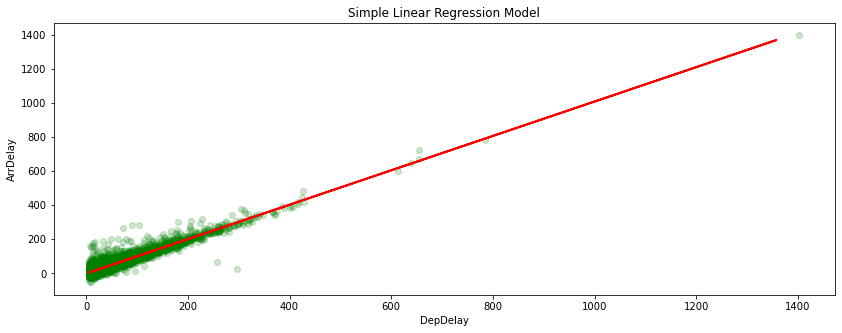

In [23]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(x_train.DepDelay, y_train.ArrDelay, color = 'green', alpha = .2)
plt.plot(x_test.DepDelay, ArrDelay_pred, c= 'red', linewidth = 2)

plt.title('Simple Linear Regression Model')
plt.xlabel('DepDelay')
plt.ylabel('ArrDelay')
plt.show()

Graphically we see that regression line adjust well to scatter plot.

### **Second model: Multiple Linear Regression**

**Multicollinearity analysis**

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
x_train_num = x_train.select_dtypes(include = ['int64']) # select numerical values

In [26]:
def vif(variables):
    vif_data = pd.DataFrame() # Empty data frame
    vif_data['feature'] = variables.columns # Include the columns name into dataframe
    vif_data['Variance Inflation Factor(VIF)'] = [variance_inflation_factor(variables.values, i) for i in range(len(variables.columns))]
    return vif_data

In [27]:
fetaures_vif = vif(x_train_num)

In [28]:
fetaures_vif

,feature,Variance Inflation Factor(VIF)
0,DepTime,57.792447
1,CRSDepTime,57.321820
2,ArrTime,14.450416
3,CRSArrTime,38.468507
4,ActualElapsedTime,11124.009560
5,CRSElapsedTime,187.818087
6,AirTime,8128.634221
7,DepDelay,5.025647
8,Distance,86.484537
9,TaxiIn,39.856310


Some features with high VIF have a strong multicollinearity like **ActualElapsedTime** or **AirTime**. I'm going to keep those features with VIF < 5,5 (we got up to 5,5 to include **DepDelay**, otherwise we would go up to 5. I tested without DepDelay and models predicts poorly, R_squared = 0.65).

A rule of thumb for interpreting the variance inflation factor:

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

In [29]:
features_sel = fetaures_vif[fetaures_vif['Variance Inflation Factor(VIF)'] < 5.5]['feature'].tolist()

In [30]:
x_train_mlr = x_train[features_sel]

In [31]:
x_train_const = sm.add_constant(x_train_mlr)

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
mlr_model = sm.OLS(y_train.ArrDelay, x_train_const).fit()

In [33]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.573e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:04:13   Log-Likelihood:                -33691.
No. Observations:                8000   AIC:                         6.740e+04
Df Residuals:                    7993   BIC:                         6.745e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2044      0.274    -15.328      0.000      -4.742      -3.667
DepDelay              0.9215      0.006    162.356      0.000       0.910       0.933
CarrierDelay          0.0663      0.007      9.984      0.000       0.053       0.079
WeatherDelay          0.1069      0.009     11.374      0.000       0.088       0.125
NASDelay              0.2899      0.007     41.177      0.000       0.276       0.304
SecurityDelay         0.1652      0.117      1.413      0.158      -0.064       0.394
LateAircraftDelay     0.0623      0.007      9.128      0.000       0.049       0.076
==============================================================================
Omnibus:                     1782.316   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77394.395
Skew:                           0.183   Prob(JB):                         0.00
Kurtosis:                      18.233   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x_test_mlr = x_test[features_sel]
x_test_const = sm.add_constant(data = x_test_mlr)

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
ArrDelay_pred2 = mlr_model.predict(x_test_const)

In [36]:
ArrDelay_pred2 = pd.DataFrame(ArrDelay_pred2, columns = ['ArrDelay_pred'])

In [37]:
compare2 = pd.concat([y_test, ArrDelay_pred2], axis = 'columns')
compare2

,ArrDelay,ArrDelay_pred
1977,161,158.515882
3880,63,28.015031
52,11,7.330457
2551,33,13.006160
2246,7,4.697092
...,...,...
9505,24,29.638747
2836,-1,5.711352
1169,20,14.083829
9929,-13,10.923635


Let' calculate Mean Squared Error and R2 to compare later:

In [38]:
MSE_mlr = mean_squared_error(compare2.ArrDelay, compare2.ArrDelay_pred)
MSE_mlr

265.7469061875144

In [39]:
Rsq_mlr = mlr_model.rsquared
Rsq_mlr

0.9219374078431338

### **Third model: Random Forest Regression**

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
x_train_rfr = x_train[features_sel]
x_test_rfr = x_test[features_sel]

In [42]:
rfr_model = RandomForestRegressor(n_estimators = 10, random_state = 7).fit(x_train_rfr, y_train.ArrDelay)
rfr_model

RandomForestRegressor(n_estimators=10, random_state=7)

In [43]:
ArrDelay_pred3 = rfr_model.predict(x_test_rfr)

In [44]:
compare3 = y_test.copy()
compare3['ArrDelay_pred'] = ArrDelay_pred3
compare3

,ArrDelay,ArrDelay_pred
1977,161,160.6
3880,63,44.8
52,11,4.4
2551,33,12.3
2246,7,2.6
...,...,...
9505,24,24.0
2836,-1,-1.7
1169,20,19.9
9929,-13,-10.8


Let' calculate Mean Squared Error and R2:

In [45]:
MSE_rfr = mean_squared_error(compare3.ArrDelay, compare3.ArrDelay_pred)
MSE_rfr

246.27283805601618

In [46]:
Rsq_rfr = rfr_model.score(x_test_rfr, y_test)
Rsq_rfr

0.9401291092830109

### **Fourth model: Neural Network Regression**

In [47]:
from sklearn.neural_network import MLPRegressor

In [48]:
x_train_nnr = x_train[features_sel]
x_test_nnr = x_test[features_sel]

In [49]:
nnr_model = MLPRegressor(hidden_layer_sizes=(len(x_train_nnr.columns),len(x_train_nnr.columns),len(x_train_nnr.columns)), 
                         activation='relu', solver='adam', random_state=7, max_iter=500).fit(x_train_nnr, y_train.ArrDelay)
nnr_model

MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=500, random_state=7)

In [50]:
ArrDelay_pred4 = nnr_model.predict(x_test_nnr)

In [51]:
compare4 = y_test.copy()
compare4['ArrDelay_pred'] = ArrDelay_pred4
compare4

,ArrDelay,ArrDelay_pred
1977,161,163.498742
3880,63,60.121990
52,11,3.200738
2551,33,29.645702
2246,7,0.864575
...,...,...
9505,24,23.874276
2836,-1,1.467981
1169,20,16.653834
9929,-13,-0.039491


Let' calculate Mean Squared Error and R2:

In [52]:
MSE_nnr = mean_squared_error(compare4.ArrDelay, compare4.ArrDelay_pred)
MSE_nnr

94.26551982540785

In [53]:
Rsq_nnr = nnr_model.score(x_test_nnr, y_test)
Rsq_nnr

0.9770833004549065

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Compare them on the basis of MSE and Rsq</SPAN>

Let's gather R-Square and Mean Squared Error for all the models we tried:

In [54]:
MSE_Rsqr = [{'R-Square': Rsq_slr, 'MSE': MSE_slr}, {'R-Square': Rsq_mlr, 'MSE': MSE_mlr}, {'R-Square': Rsq_rfr, 'MSE': MSE_rfr}, {'R-Square': Rsq_nnr, 'MSE': MSE_nnr}]
df_MSE_Rsqr = pd.DataFrame(MSE_Rsqr, index = ['Simple Linear Regression', 'Multiple Linear Regression', 'Random Forest Regression', 'Neural Network Regression'])
df_MSE_Rsqr

,R-Square,MSE
Simple Linear Regression,0.903965,288.674425
Multiple Linear Regression,0.921937,265.746906
Random Forest Regression,0.940129,246.272838
Neural Network Regression,0.977083,94.265520


All models are pretty accurate but the best one seems to be **Neural Network Regression** as it has the **highest R-Square and lower MSE**.

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Train them using the different parameters they allow</SPAN>

### **Multiple Linear Regression - parameters**

**Parameters** 

class statsmodels.regression.linear_model.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)

* endog: array_like  
A 1-d endogenous response variable. The dependent variable.

* exog: array_like  
A nobs x k array where nobs is the number of observations and k is the number of regressors. An intercept is not included by default and should be added by the user. See statsmodels.tools.add_constant.

* missing: str  
Available options are ‘none’, ‘drop’, and ‘raise’. If ‘none’, no nan checking is done. If ‘drop’, any observations with nans are dropped. If ‘raise’, an error is raised. Default is ‘none’.

* hasconst: None or bool  
Indicates whether the RHS includes a user-supplied constant. If True, a constant is not checked for and k_constant is set to 1 and all result statistics are calculated as if a constant is present. If False, a constant is not checked for and k_constant is set to 0.


I think we do not have much to play here. If we had used **class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)*** we could normalize data, although deprecated, bus we have used the statsmodel instead. 

Let's normalize the data in order rerun the regression with the previously used statsmodel:

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Train and Test data normalization

x_train_nm = pd.DataFrame(MinMaxScaler().fit_transform(x_train_num))
x_train_nm.columns = x_train_num.columns

y_train_nm = pd.DataFrame(MinMaxScaler().fit_transform(y_train))
y_train_nm.columns = y_train.columns

x_test_nm = pd.DataFrame(MinMaxScaler().fit_transform(x_test_mlr))
x_test_nm.columns = x_test_mlr.columns

y_test_nm = pd.DataFrame(MinMaxScaler().fit_transform(y_test))
y_test_nm.columns = y_test.columns

In [57]:
x_train_nm_mlr = x_train_nm[features_sel]

In [58]:
x_train_nm_const = sm.add_constant(x_train_nm_mlr)
x_test_nm_const = sm.add_constant(data = x_test_nm)

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
mlr_model_nm = sm.OLS(y_train_nm.ArrDelay, x_train_nm_const).fit()

In [60]:
mlr_model_nm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.573e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:04:36   Log-Likelihood:                 24532.
No. Observations:                8000   AIC:                        -4.905e+04
Df Residuals:                    7993   BIC:                        -4.900e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0375      0.000    194.651      0.000       0.037       0.038
DepDelay              0.8890      0.005    162.356      0.000       0.878       0.900
CarrierDelay          0.0300      0.003      9.984      0.000       0.024       0.036
WeatherDelay          0.0957      0.008     11.374      0.000       0.079       0.112
NASDelay              0.0963      0.002     41.177      0.000       0.092       0.101
SecurityDelay         0.0066      0.005      1.413      0.158      -0.003       0.016
LateAircraftDelay     0.0170      0.002      9.128      0.000       0.013       0.021
==============================================================================
Omnibus:                     1782.316   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77394.395
Skew:                           0.183   Prob(JB):                         0.00
Kurtosis:                      18.233   Cond. No.                         73.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
ArrDelay_pred22 = mlr_model.predict(x_test_nm_const)

In [62]:
ArrDelay_pred22 = pd.DataFrame(ArrDelay_pred22, columns = ['ArrDelay_pred'])
ArrDelay_pred22 = ArrDelay_pred22.reset_index(drop = True)

In [63]:
compare22 = pd.concat([y_test_nm, ArrDelay_pred22], axis = 'columns')
compare22

,ArrDelay,ArrDelay_pred
0,0.139568,-4.088024
1,0.069065,-4.176910
2,0.031655,-4.190050
3,0.047482,-4.190265
4,0.028777,-4.200983
...,...,...
1995,0.041007,-4.183417
1996,0.023022,-4.198332
1997,0.038129,-4.191153
1998,0.014388,-4.189283


Let' calculate Mean Squared Error and R2:

In [64]:
MSE_mlr_nm = mean_squared_error(compare22.ArrDelay, compare22.ArrDelay_pred)
MSE_mlr_nm

17.806394138739698

In [65]:
Rsq_mlr_nm = mlr_model_nm.rsquared
Rsq_mlr_nm

0.9219374078431338

In [66]:
parameters = pd.DataFrame([{'R-Square': Rsq_mlr_nm, 'MSE': MSE_mlr_nm}], index=['Multiple Linear Regression Normalized'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network Regression,0.977083,94.265520
Random Forest Regression,0.940129,246.272838
Simple Linear Regression,0.903965,288.674425


Not bad! But still Neural Network Regression predicts better.

### **Random Forest Regression - parameters**

**Parameters available:**  
class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

I'm going to modify these parameters:

**Parameters to modify**
* n_estimators: int, default=100 //// **we used 10 in previous exercise**  
The number of trees in the forest.

* max_depth: int, default=None //// **we used defaul=None in previous exercise**  
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**Increase n_estimators from 10 to 100:**

In [67]:
rfr_model2 = RandomForestRegressor(n_estimators = 100, random_state = 7).fit(x_train_rfr, y_train.ArrDelay)

In [68]:
ArrDelay_pred32 = rfr_model2.predict(x_test_rfr)

In [69]:
compare32 = y_test.copy()
compare32['ArrDelay_pred'] = ArrDelay_pred32

Let' calculate Mean Squared Error and R2:

In [70]:
MSE_rfr2 = mean_squared_error(compare32.ArrDelay, compare32.ArrDelay_pred)
MSE_rfr2

255.4549175361135

In [71]:
Rsq_rfr2 = rfr_model2.score(x_test_rfr, y_test)
Rsq_rfr2

0.9378968725432751

**Increase max_depth from None to 5:**

In [72]:
rfr_model3 = RandomForestRegressor(n_estimators = 10, max_depth=5,  random_state = 7).fit(x_train_rfr, y_train.ArrDelay)

In [73]:
ArrDelay_pred33 = rfr_model3.predict(x_test_rfr)

In [74]:
compare33 = y_test.copy()
compare33['ArrDelay_pred'] = ArrDelay_pred33

Let' calculate Mean Squared Error and R2:

In [75]:
MSE_rfr3 = mean_squared_error(compare33.ArrDelay, compare33.ArrDelay_pred)
MSE_rfr3

287.77139074438026

In [76]:
Rsq_rfr3 = rfr_model3.score(x_test_rfr, y_test)
Rsq_rfr3

0.930040480214006

In [77]:
parameters = pd.DataFrame([{'R-Square': Rsq_rfr2, 'MSE': MSE_rfr2}, {'R-Square': Rsq_rfr3, 'MSE': MSE_rfr3}], 
                          index=['Random Forest (Increase n_estimators)', 'Random Forest (Increase max_depth)'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network Regression,0.977083,94.265520
Random Forest (Increase max_depth),0.930040,287.771391
Random Forest (Increase n_estimators),0.937897,255.454918
Random Forest Regression,0.940129,246.272838
Simple Linear Regression,0.903965,288.674425


### **Neural Network Regression - parameters**

**Parameters available:**

class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

**Parameters to modify**

solver: {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’  
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

**Change solver to lbfgs**

In [78]:
nnr_model2 = MLPRegressor((len(x_train_nnr.columns),len(x_train_nnr.columns),len(x_train_nnr.columns)), activation='relu', solver ='lbfgs', random_state=7, max_iter=500).fit(x_train_nnr, y_train.ArrDelay)
nnr_model2

C:\Users\AlbertoAR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=500, random_state=7,
             solver='lbfgs')

I will model with Normalized data!!

In [79]:
ArrDelay_pred42 = nnr_model2.predict(x_test_nnr)

In [80]:
compare42 = y_test.copy()
compare42['ArrDelay_pred'] = ArrDelay_pred42
compare42

,ArrDelay,ArrDelay_pred
1977,161,161.329094
3880,63,59.556205
52,11,1.562419
2551,33,29.696693
2246,7,2.329094
...,...,...
9505,24,22.592957
2836,-1,2.402166
1169,20,18.053732
9929,-13,1.116694


Let' calculate Mean Squared Error and R2:

In [81]:
MSE_nnr2 = mean_squared_error(compare42.ArrDelay, compare42.ArrDelay_pred)
MSE_nnr2

96.58539988636723

In [82]:
Rsq_nnr2 = nnr_model.score(x_test_rfr, y_test)
Rsq_nnr2

0.9770833004549065

**With Normalized Data and adam solver**

In [83]:
x_train_nnr_nm = pd.DataFrame(MinMaxScaler().fit_transform(x_train_nnr))
x_train_nnr_nm.columns = x_train_nnr.columns

x_test_nnr_nm = pd.DataFrame(MinMaxScaler().fit_transform(x_test_nnr))
x_test_nnr_nm.columns = x_test_nnr.columns

In [84]:
nnr_model3 = MLPRegressor((len(x_train_nnr_nm.columns),len(x_train_nnr_nm.columns),len(x_train_nnr_nm.columns)), activation='relu', solver ='adam', random_state=7, max_iter=500).fit(x_train_nnr_nm, y_train_nm.ArrDelay)
nnr_model3

MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=500, random_state=7)

In [85]:
ArrDelay_pred43 = nnr_model3.predict(x_test_nnr_nm)

In [86]:
compare43 = y_test_nm.copy()
compare43['ArrDelay_pred'] = ArrDelay_pred43
compare43

,ArrDelay,ArrDelay_pred
0,0.139568,0.129119
1,0.069065,0.051445
2,0.031655,0.053031
3,0.047482,0.045377
4,0.028777,0.036133
...,...,...
1995,0.041007,0.049638
1996,0.023022,0.039018
1997,0.038129,0.045210
1998,0.014388,0.048046


Let' calculate Mean Squared Error and R2:

In [87]:
MSE_nnr3 = mean_squared_error(compare43.ArrDelay, compare43.ArrDelay_pred)
MSE_nnr3

0.0006149702121422159

In [88]:
Rsq_nnr3 = nnr_model3.score(x_test_nnr_nm, y_test_nm)
Rsq_nnr3

0.711143007905926

In [89]:
parameters = pd.DataFrame([{'R-Square': Rsq_nnr2, 'MSE': MSE_nnr2}, {'R-Square': Rsq_nnr3, 'MSE': MSE_nnr3}], 
                          index=['Neural Network (lbfgs solver)', 'Neural Network (normalized data, adam solver)'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network Regression,0.977083,94.265520
Random Forest (Increase max_depth),0.930040,287.771391
Random Forest (Increase n_estimators),0.937897,255.454918
Random Forest Regression,0.940129,246.272838
Simple Linear Regression,0.903965,288.674425


Changing solvers didn't do much, R-Square remains the same and MSE got a little bit higher. Normalized data reduce drastically MSE but also R-Square.

### <SPAN style=color:#1F618D>Practice 4</SPAN>

<SPAN style=color:#1F618D>Compare their performance using the test/train approach or using all data (internal validation)</SPAN>

Let's run de models using all data without spliting.

### **Multiple Linear Regression - all data**

In [90]:
x_all_mlr = x[features_sel]
y_all_mlr = y

In [91]:
x_all_mlr = sm.add_constant(x_all_mlr)

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [92]:
mlr_model_all = sm.OLS(y_all_mlr.ArrDelay, x_all_mlr).fit()

In [93]:
mlr_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.059e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:04:45   Log-Likelihood:                -42105.
No. Observations:               10000   AIC:                         8.422e+04
Df Residuals:                    9993   BIC:                         8.427e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1185      0.242    -17.007      0.000      -4.593      -3.644
DepDelay              0.9181      0.005    179.965      0.000       0.908       0.928
CarrierDelay          0.0705      0.006     11.901      0.000       0.059       0.082
WeatherDelay          0.1136      0.009     13.276      0.000       0.097       0.130
NASDelay              0.2737      0.006     43.224      0.000       0.261       0.286
SecurityDelay         0.1830      0.114      1.604      0.109      -0.041       0.407
LateAircraftDelay     0.0650      0.006     10.473      0.000       0.053       0.077
==============================================================================
Omnibus:                     2177.371   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83208.492
Skew:                           0.228   Prob(JB):                         0.00
Kurtosis:                      17.124   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
ArrDelay_pred_all = mlr_model_all.predict(x_all_mlr)

In [95]:
ArrDelay_pred_all = pd.DataFrame(ArrDelay_pred_all, columns = ['ArrDelay_pred'])

In [96]:
compare_mlr_all = pd.concat([y_all_mlr, ArrDelay_pred_all], axis = 'columns')
compare_mlr_all

,ArrDelay,ArrDelay_pred
0,3,10.930521
1,28,22.643649
2,10,8.904275
3,198,195.911748
4,3,10.853755
...,...,...
9995,97,99.118802
9996,36,24.321521
9997,36,23.469321
9998,12,13.605514


Let' calculate Mean Squared Error and R2:

In [97]:
MSE_mlr_all = mean_squared_error(compare_mlr_all.ArrDelay, compare_mlr_all.ArrDelay_pred)
MSE_mlr_all

265.8981303151202

In [98]:
Rsq_mlr_all = mlr_model_all.rsquared
Rsq_mlr_all

0.9251687505949514

In [99]:
parameters = pd.DataFrame([{'R-Square': Rsq_mlr_all, 'MSE': MSE_mlr_all}], 
                          index=['Multiple Linear - all data'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network Regression,0.977083,94.265520
Random Forest (Increase max_depth),0.930040,287.771391
Random Forest (Increase n_estimators),0.937897,255.454918
Random Forest Regression,0.940129,246.272838
Simple Linear Regression,0.903965,288.674425


Results are almost identical to Multiple Linear Regression with the data being splitted between Train and Test.

### **Random Forest Regression - all data**

In [100]:
x_all_rfr = x[features_sel]
y_all_rfr = y

In [101]:
rfr_model_all = RandomForestRegressor(n_estimators = 10, random_state = 7).fit(x_all_rfr, y_all_rfr.ArrDelay)
rfr_model_all

RandomForestRegressor(n_estimators=10, random_state=7)

In [102]:
ArrDelay_all2 = rfr_model_all.predict(x_all_rfr)

In [103]:
compare_rfr_all = y_all_rfr.copy()
compare_rfr_all['ArrDelay_pred'] = ArrDelay_all2
compare_rfr_all

,ArrDelay,ArrDelay_pred
0,3,2.500000
1,28,27.900000
2,10,7.800000
3,198,192.800000
4,3,3.800000
...,...,...
9995,97,97.300000
9996,36,35.400000
9997,36,35.600000
9998,12,16.097421


Let' calculate Mean Squared Error and R2:

In [104]:
MSE_rfr_all = mean_squared_error(compare_rfr_all.ArrDelay, compare_rfr_all.ArrDelay_pred)
MSE_rfr_all

34.537842431822725

In [105]:
Rsq_rfr_all = rfr_model.score(x_test_rfr, y_test)
Rsq_rfr_all

0.9401291092830109

In [106]:
parameters = pd.DataFrame([{'R-Square': Rsq_rfr_all, 'MSE': MSE_rfr_all}], 
                          index=['Random Forest - all data'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network Regression,0.977083,94.265520
Random Forest (Increase max_depth),0.930040,287.771391
Random Forest (Increase n_estimators),0.937897,255.454918
Random Forest - all data,0.940129,34.537842
Random Forest Regression,0.940129,246.272838


Compared with the other Random Forest regression that we did with data divided into Train and Test, this one with all data has a lower MSE but R-Square remains the same.

### **Neural Network Regression - all data**

In [107]:
x_all_nnr = x[features_sel]
y_all_nnr = y

In [108]:
nnr_model_all = MLPRegressor(hidden_layer_sizes=(len(x_all_nnr.columns),len(x_all_nnr.columns),len(x_all_nnr.columns)), 
                         activation='relu', solver='adam', random_state=7, max_iter=500).fit(x_all_nnr, y_all_nnr.ArrDelay)
nnr_model_all

MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=500, random_state=7)

In [109]:
ArrDelay_all4 = nnr_model_all.predict(x_all_nnr)

In [110]:
compare_nnr_all = y_all_nnr.copy()
compare_nnr_all['ArrDelay_pred'] = ArrDelay_all4
compare_nnr_all

,ArrDelay,ArrDelay_pred
0,3,1.112907
1,28,26.603539
2,10,2.845108
3,198,195.515949
4,3,1.650498
...,...,...
9995,97,95.402834
9996,36,34.284092
9997,36,34.200987
9998,12,16.269134


Let' calculate Mean Squared Error and R2:

In [111]:
MSE_nnr_all = mean_squared_error(compare_nnr_all.ArrDelay, compare_nnr_all.ArrDelay_pred)
MSE_nnr_all

84.69249564831503

In [112]:
Rsq_nnr_all = nnr_model.score(x_all_nnr, y_all_nnr)
Rsq_nnr_all

0.975840494404741

In [113]:
parameters = pd.DataFrame([{'R-Square': Rsq_nnr_all, 'MSE': MSE_nnr_all}], 
                          index=['Neural Network - all data'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network - all data,0.975840,84.692496
Neural Network Regression,0.977083,94.265520
Random Forest (Increase max_depth),0.930040,287.771391
Random Forest (Increase n_estimators),0.937897,255.454918
Random Forest - all data,0.940129,34.537842


Compared with previous Neural Neural Regressions, in this one R-Square it's a tiny lower and also does the Mean Squared Error.

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 5</SPAN>

<SPAN style=color:#1F618D>Perform some variable engineering process to improve your prediction</SPAN>

I already did some feature engineering in in previous Tasca-S09 T02 and in previous practice of this task: normalizing and standarizing data, dummy variables, created new columns, etc..

Now let's to try with Principal Component Analysis with some important categorical variables transformed into dummy variables and Train-Test data (I already did PCA in S09 T01 but without a target variable):

In [114]:
# Prepare data

x_pca = pd.get_dummies(x, columns = ['DayOfWeek', 'CancellationCode', 'UniqueCarrier'])
y_pca = y

In [115]:
x_pca = x_pca.select_dtypes(include = ['int64', 'uint8'])
x_pca.shape

(10000, 44)

In [116]:
# Standarize data

x_pca_nm = pd.DataFrame(MinMaxScaler().fit_transform(x_pca))
x_pca_nm.columns = x_pca.columns

y_pca_nm = pd.DataFrame(MinMaxScaler().fit_transform(y_pca))
y_pca_nm.columns = y_pca.columns

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(.95) #95% of the variance is retained
z = pca.fit_transform(x_pca_nm)
x_pca_nmz = pd.DataFrame(data = z)

In [119]:
pca_explnm = pca.explained_variance_ratio_.round(3) # how much variance exlains each PCA column
pca_explnm

array([0.086, 0.08 , 0.075, 0.074, 0.07 , 0.065, 0.061, 0.054, 0.048,
       0.041, 0.034, 0.033, 0.028, 0.028, 0.026, 0.024, 0.023, 0.02 ,
       0.018, 0.017, 0.016, 0.015, 0.013])

In [120]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca_nm, y_pca_nm, test_size = 0.2, random_state = 7) # 80%-20% proportiona

In [121]:
x_train_pca.shape, x_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((8000, 44), (2000, 44), (8000, 1), (2000, 1))

### **Multiple Linear Regression - PCA**

In [122]:
mlr_model_pca = sm.OLS(y_train_pca.ArrDelay, x_train_pca).fit()

In [123]:
mlr_model_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.881e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:05:23   Log-Likelihood:                 37199.
No. Observations:                8000   AIC:                        -7.431e+04
Df Residuals:                    7958   BIC:                        -7.402e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
DepTime                  -0.0001      0.000     -0.408      0.683      -0.001       0.000
CRSDepTime                0.0002      0.000      0.772      0.440      -0.000       0.001
ArrTime               -6.405e-05      0.000     -0.448      0.654      -0.000       0.000
CRSArrTime                0.0002      0.000      1.059      0.289      -0.000       0.001
ActualElapsedTime         0.7645      0.010     76.943      0.000       0.745       0.784
CRSElapsedTime           -0.3641      0.001   -248.278      0.000      -0.367      -0.361
AirTime                  -0.3809      0.010    -39.141      0.000      -0.400      -0.362
DepDelay                  0.9569      0.001    824.761      0.000       0.955       0.959
Distance                  0.0017      0.001      1.259      0.208      -0.001       0.004
TaxiIn                   -0.0804      0.002    -37.493      0.000      -0.085      -0.076
TaxiOut                  -0.1615      0.004    -39.317      0.000      -0.170      -0.153
CarrierDelay              0.0061      0.001      4.650      0.000       0.004       0.009
WeatherDelay              0.0067      0.002      3.797      0.000       0.003       0.010
NASDelay                  0.0057      0.001      6.841      0.000       0.004       0.007
SecurityDelay             0.0004      0.001      0.367      0.714      -0.002       0.002
LateAircraftDelay         0.0017      0.000      4.333      0.000       0.001       0.002
DayOfWeek_Friday          0.0353      0.000    175.869      0.000       0.035       0.036
DayOfWeek_Monday          0.0351      0.000    174.829      0.000       0.035       0.036
DayOfWeek_Saturday        0.0352      0.000    174.036      0.000       0.035       0.036
DayOfWeek_Sunday          0.0351      0.000    172.320      0.000       0.035       0.036
DayOfWeek_Thursday        0.0354      0.000    175.709      0.000       0.035       0.036
DayOfWeek_Tuesday         0.0352      0.000    172.550      0.000       0.035       0.036
DayOfWeek_Wednesday       0.0352      0.000    175.162      0.000       0.035       0.036
CancellationCode_None   2.12e-15   4.26e-17     49.810      0.000    2.04e-15     2.2e-15
UniqueCarrier_9E          0.0123      0.000     72.178      0.000       0.012       0.013
UniqueCarrier_AA          0.0123      0.000    102.516      0.000       0.012       0.013
UniqueCarrier_AQ          0.0121      0.001      9.360      0.000       0.010       0.015
UniqueCarrier_AS          0.0123      0.000     63.114      0.000       0.012       0.013
UniqueCarrier_B6          0.0122      0.000     71.671      0.000       0.012       0.013
UniqueCarrier_CO          0.0121      0.000     84.628      0.000       0.012       0.012
UniqueCarrier_DL          0.0124      0.000     90.942      0.000       0.012       0.013
UniqueCarrier_EV       

In [124]:
ArrDelay_pred_pca = mlr_model_pca.predict(x_test_pca)

In [125]:
ArrDelay_pred_pca = pd.DataFrame(ArrDelay_pred_pca, columns = ['ArrDelay_pred'])

In [126]:
compare_mlr_pca = pd.concat([y_test_pca, ArrDelay_pred_pca], axis = 'columns')
compare_mlr_pca

,ArrDelay,ArrDelay_pred
1977,0.147790,0.148002
3880,0.080110,0.079693
52,0.044199,0.044124
2551,0.059392,0.059342
2246,0.041436,0.041394
...,...,...
9505,0.053177,0.052858
2836,0.035912,0.036031
1169,0.050414,0.049931
9929,0.027624,0.027870


Let' calculate Mean Squared Error and R2:

In [127]:
MSE_mlr_psa = mean_squared_error(compare_mlr_pca.ArrDelay, compare_mlr_pca.ArrDelay_pred)
MSE_mlr_psa

1.1710317898173043e-05

In [128]:
Rsq_mlr_psa = mlr_model_pca.rsquared
Rsq_mlr_psa

0.9967103021531142

In [129]:
parameters = pd.DataFrame([{'R-Square': Rsq_mlr_psa, 'MSE': MSE_mlr_psa}], 
                          index=['Multiple Linear Regression - PCA'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression - PCA,0.996710,0.000012
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network - all data,0.975840,84.692496
Neural Network Regression,0.977083,94.265520
Random Forest (Increase max_depth),0.930040,287.771391
Random Forest (Increase n_estimators),0.937897,255.454918


Waauu, PCA did the trick. So far this is the best model to predict **ArrDelay**, with the highest R-Square and lowest MSE.

### **Neural Network Regression - PCA**

In [130]:
nnr_model_pca = MLPRegressor(hidden_layer_sizes=(len(x_train_pca.columns),len(x_train_pca.columns),len(x_train_pca.columns)), 
                         activation='relu', solver='adam', random_state=7, max_iter=500).fit(x_train_pca, y_train_pca.ArrDelay)
nnr_model_pca

MLPRegressor(hidden_layer_sizes=(44, 44, 44), max_iter=500, random_state=7)

In [131]:
ArrDelay_nnr_pca = nnr_model_pca.predict(x_test_pca)

In [132]:
compare_nnr_pca = y_test_pca.copy()
compare_nnr_pca['ArrDelay_pred'] = ArrDelay_nnr_pca
compare_nnr_pca

,ArrDelay,ArrDelay_pred
1977,0.147790,0.142101
3880,0.080110,0.052197
52,0.044199,0.041510
2551,0.059392,0.070773
2246,0.041436,0.041449
...,...,...
9505,0.053177,0.051269
2836,0.035912,0.041833
1169,0.050414,0.040902
9929,0.027624,0.042882


Let' calculate Mean Squared Error and R2:

In [133]:
MSE_nnr_pca = mean_squared_error(compare_nnr_pca.ArrDelay, compare_nnr_pca.ArrDelay_pred)
MSE_nnr_pca

0.00015409889756236046

In [134]:
Rsq_nnr_pca = nnr_model_pca.score(x_test_pca, y_test_pca)
Rsq_nnr_pca

0.9214518683128371

In [135]:
parameters = pd.DataFrame([{'R-Square': Rsq_nnr_pca, 'MSE': MSE_nnr_pca}], index=['Neural Network - PCA'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression - PCA,0.996710,0.000012
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network - PCA,0.921452,0.000154
Neural Network - all data,0.975840,84.692496
Neural Network Regression,0.977083,94.265520
Random Forest (Increase max_depth),0.930040,287.771391


Compared with previous Neural Neural Regressions this one has a lower R-Square and much lower MSE. This could be because the number of variables considering there are quite a few more due to dummy variables.

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 6</SPAN>

<SPAN style=color:#1F618D>Do not use the DepDelay variable when making predictions</SPAN>

In [136]:
x2 = flights.drop(['ArrDelay', 'DepDelay'], axis = 'columns')
y2 = pd.DataFrame(flights.ArrDelay)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 7)

In [137]:
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((8000, 23), (2000, 23), (8000, 1), (2000, 1))

### **Multiple Linear Regression - no DepDelay**

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

In [138]:
features_sel.remove('DepDelay')

In [139]:
x2_train_mlr = x2_train[features_sel]

In [140]:
x2_train_mlr = sm.add_constant(x2_train_mlr)

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [141]:
mlr_model_no = sm.OLS(y2_train.ArrDelay, x2_train_mlr).fit()

In [142]:
mlr_model_no.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3167.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:05:26   Log-Likelihood:                -39524.
No. Observations:                8000   AIC:                         7.906e+04
Df Residuals:                    7994   BIC:                         7.910e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.7637      0.567    -13.698      0.000      -8.875      -6.653
CarrierDelay          0.8017      0.010     79.590      0.000       0.782       0.821
WeatherDelay          0.8976      0.017     53.879      0.000       0.865       0.930
NASDelay              0.8760      0.013     69.925      0.000       0.851       0.901
SecurityDelay         0.7089      0.242      2.927      0.003       0.234       1.184
LateAircraftDelay     0.8345      0.010     82.128      0.000       0.815       0.854
==============================================================================
Omnibus:                     4743.780   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75805.110
Skew:                          -2.541   Prob(JB):                         0.00
Kurtosis:                      17.199   Cond. No.                         71.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
x2_test_mlr = x2_test[features_sel]
x2_test_mlr = sm.add_constant(data = x2_test_mlr)

C:\Users\AlbertoAR\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [144]:
ArrDelay_pred_no = mlr_model_no.predict(x2_test_mlr)

In [145]:
ArrDelay_pred_no = pd.DataFrame(ArrDelay_pred_no, columns = ['ArrDelay_pred'])

In [146]:
compare_no = pd.concat([y2_test, ArrDelay_pred_no], axis = 'columns')
compare_no

,ArrDelay,ArrDelay_pred
1977,161,121.311456
3880,63,45.936366
52,11,35.630628
2551,33,20.588409
2246,7,19.865641
...,...,...
9505,24,11.477346
2836,-1,21.797027
1169,20,9.009336
9929,-13,65.703239


Let' calculate Mean Squared Error and R2:

In [147]:
MSE_mlr_no = mean_squared_error(compare_no.ArrDelay, compare_no.ArrDelay_pred)
MSE_mlr_no

1070.5050403317357

In [148]:
Rsq_mlr = mlr_model_no.rsquared
Rsq_mlr

0.6645006104546811

In [149]:
parameters = pd.DataFrame([{'R-Square': Rsq_mlr, 'MSE': MSE_mlr_no}], index=['Multiple Linear - no DepDelay'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear - no DepDelay,0.664501,1070.505040
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression - PCA,0.996710,0.000012
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network - PCA,0.921452,0.000154
Neural Network - all data,0.975840,84.692496
Neural Network Regression,0.977083,94.265520


Not considering the **DepDelay** variable results in a less accurate model. There is a very strong correlation between target variable **ArrDelay** and **DepDelay** as we saw at the beginnig of the notebook.

### **Random Forest Regression - no DepDelay**

In [150]:
x_train_rfr_no = x2_train[features_sel]
x_test_rfr_no = x2_test[features_sel]

In [151]:
rfr_model_no = RandomForestRegressor(n_estimators = 10, random_state = 7).fit(x_train_rfr_no, y2_train.ArrDelay)
rfr_model_no

RandomForestRegressor(n_estimators=10, random_state=7)

In [152]:
ArrDelay_pred_rfr_no = rfr_model_no.predict(x_test_rfr_no)

In [153]:
compare_rfr_no = y2_test.copy()
compare_rfr_no['ArrDelay_pred'] = ArrDelay_pred_rfr_no
compare_rfr_no

,ArrDelay,ArrDelay_pred
1977,161,162.400000
3880,63,26.300000
52,11,52.000000
2551,33,30.300000
2246,7,10.400000
...,...,...
9505,24,21.947902
2836,-1,15.700000
1169,20,13.675000
9929,-13,60.300000


Let' calculate Mean Squared Error and R2:

In [154]:
MSE_rfr_no = mean_squared_error(compare_rfr_no.ArrDelay, compare_rfr_no.ArrDelay_pred)
MSE_rfr_no

1480.5598778908368

In [155]:
Rsq_rfr_no = rfr_model_no.score(x_test_rfr_no, y2_test)
Rsq_rfr_no

0.6400640876644348

In [156]:
parameters = pd.DataFrame([{'R-Square': Rsq_rfr_no, 'MSE': MSE_rfr_no}], index=['Random Forest - no DepDelay'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear - no DepDelay,0.664501,1070.505040
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression - PCA,0.996710,0.000012
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network - PCA,0.921452,0.000154
Neural Network - all data,0.975840,84.692496
Neural Network Regression,0.977083,94.265520


### **Neural Network Regression - no DepDelay**

In [157]:
x_train_nnr_no = x2_train[features_sel]
x_test_nnr_no = x2_test[features_sel]

In [158]:
nnr_model_no = MLPRegressor(hidden_layer_sizes=(len(x_train_nnr_no.columns),len(x_train_nnr_no.columns),len(x_train_nnr_no.columns)), 
                         activation='relu', solver='adam', random_state=7, max_iter=500).fit(x_train_nnr_no, y2_train.ArrDelay)
nnr_model_no

MLPRegressor(hidden_layer_sizes=(5, 5, 5), max_iter=500, random_state=7)

In [159]:
ArrDelay_pred_nnr_no = nnr_model_no.predict(x_test_nnr_no)

In [160]:
compare_nnr_no = y_test.copy()
compare_nnr_no['ArrDelay_pred'] = ArrDelay_pred_nnr_no
compare_nnr_no

,ArrDelay,ArrDelay_pred
1977,161,135.785250
3880,63,32.399223
52,11,42.239847
2551,33,13.582237
2246,7,21.736148
...,...,...
9505,24,15.756125
2836,-1,20.074529
1169,20,11.515434
9929,-13,54.581400


Let' calculate Mean Squared Error and R2:

In [161]:
MSE_nnr_no = mean_squared_error(compare_nnr_no.ArrDelay, compare_nnr_no.ArrDelay_pred)
MSE_nnr_no

992.553434711853

In [162]:
Rsq_nnr = nnr_model_no.score(x_test_nnr_no, y2_test)
Rsq_nnr

0.7587023453764357

In [163]:
parameters = pd.DataFrame([{'R-Square': Rsq_rfr_no, 'MSE': MSE_rfr_no}], index=['Neural Network - no DepDelay'])
df_MSE_Rsqr = df_MSE_Rsqr.append(parameters)
df_MSE_Rsqr.sort_index()

,R-Square,MSE
Multiple Linear - all data,0.925169,265.898130
Multiple Linear - no DepDelay,0.664501,1070.505040
Multiple Linear Regression,0.921937,265.746906
Multiple Linear Regression - PCA,0.996710,0.000012
Multiple Linear Regression Normalized,0.921937,17.806394
Neural Network (lbfgs solver),0.977083,96.585400
"Neural Network (normalized data, adam solver)",0.711143,0.000615
Neural Network - PCA,0.921452,0.000154
Neural Network - all data,0.975840,84.692496
Neural Network - no DepDelay,0.640064,1480.559878


As we said, the model doesn't predict nearly as well if we don't consider **DepDelay** as it has a very strong correlation with our target variable **ArrDelay**.